# Medical insurance charges - application on multi-linear regression 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [3]:
Data = pd.read_csv("insurance.csv")

In [4]:
Data.sort_values(by=['age'], inplace=True)
Data['sex'] = Data['sex'].replace('female',0)#0 is female
Data['sex'] = Data['sex'].replace('male',1)#1 is male
Data['smoker'] = Data['smoker'].replace('no',0)#0 is No
Data['smoker'] = Data['smoker'].replace('yes',1)#1 is yes
Data['region'] = Data['region'].replace('southeast',1)
Data['region'] = Data['region'].replace('southwest',2)
Data['region'] = Data['region'].replace('northeast',3)
Data['region'] = Data['region'].replace('northwest',4)
print(Data)

      age  sex     bmi  children  smoker  region      charges
1248   18    0  39.820         0       0       1   1633.96180
482    18    0  31.350         0       0       1   1622.18850
492    18    0  25.080         0       0       3   2196.47320
525    18    0  33.880         0       0       1  11482.63485
529    18    1  25.460         0       0       3   1708.00140
...   ...  ...     ...       ...     ...     ...          ...
398    64    1  25.600         2       0       2  14988.43200
335    64    1  34.500         0       0       2  13822.80300
378    64    0  30.115         3       0       4  16455.70785
1265   64    1  23.760         0       1       1  26926.51440
635    64    1  38.190         0       0       3  14410.93210

[1338 rows x 7 columns]


In [5]:
y = Data.iloc[:, -1].values

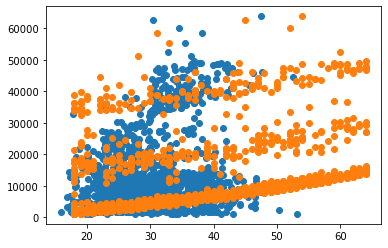

In [6]:
plt.scatter(Data['bmi'],y)
plt.scatter(Data['age'],y)#age is a much liner model

from the above graph we can say that age plays a important factor in medical insurance 

In [7]:
x = Data.iloc[:, 0:-1].values
y = y.reshape(len(y),1)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = reg.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[30753.71 20773.63]
 [ 9565.3   6112.35]
 [ 7272.23  5240.77]
 [11842.17  9140.95]
 [ 4727.96  2643.27]
 [ 9144.43  8444.47]
 [ 9544.07  1163.46]
 [10871.63 13415.04]
 [38204.35 30184.94]
 [39210.63 47291.06]
 [ 8688.66 19214.71]
 [11787.97 13047.33]
 [16698.75 12950.07]
 [ 8937.2   5138.26]
 [ 7825.36  7624.63]
 [ 8699.03 10107.22]
 [ 9433.37 28340.19]
 [24675.93 14711.74]
 [ 9866.19 12029.29]
 [14027.84 11163.57]
 [15405.41  9058.73]
 [ 7348.39  6113.23]
 [13251.76 10601.63]
 [29610.57 18767.74]
 [14062.77 20630.28]
 [26669.02 17043.34]
 [15899.29 12979.36]
 [ 7546.99  6799.46]
 [ 3370.01  2801.26]
 [31878.02 38282.75]
 [ -608.53  1121.87]
 [13168.49 29186.48]
 [10275.58  7954.52]
 [ 3111.23  2205.98]
 [ 7264.95  9644.25]
 [ 7619.17  9991.04]
 [12439.05 11881.36]
 [ 2304.14 11272.33]
 [ 7351.39  8582.3 ]
 [17173.78 14235.07]
 [ 8216.62  7742.11]
 [26610.45 17748.51]
 [ 7357.7   6067.13]
 [ 1209.31  2198.19]
 [ 3340.47  1391.53]
 [11512.09 23045.57]
 [ 2232.55  1967.02]
 [14697.71 13

In [11]:
reg.score(x_test, y_test)

0.7948868927221111

In [12]:
import pickle
pickle.dump(reg, open('reg.pkl','wb'))